In [1]:
import sys
print('Python version: ', sys.version)

Python version:  3.6.10 |Anaconda, Inc.| (default, Mar 25 2020, 18:53:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Load CityBike Trip Data

In [3]:
files = ['../data/citibike/202002-citibike-tripdata.csv.zip', '../data/citibike/202003-citibike-tripdata.csv.zip']
trip_df = pd.concat(pd.read_csv(f) for f in files)
trip_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1404,2020-02-01 00:00:05.9460,2020-02-01 00:23:30.7240,316,Fulton St & William St,40.709560,-74.006536,481,S 3 St & Bedford Ave,40.712605,-73.962644,28874,Customer,1995,1
1,1301,2020-02-01 00:00:06.2230,2020-02-01 00:21:48.0580,237,E 11 St & 2 Ave,40.730473,-73.986724,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,32588,Subscriber,1991,1
2,474,2020-02-01 00:00:15.7210,2020-02-01 00:08:10.3440,528,2 Ave & E 31 St,40.742909,-73.977061,3785,W 42 St & 6 Ave,40.754920,-73.984550,41013,Subscriber,1994,1
3,487,2020-02-01 00:00:21.0520,2020-02-01 00:08:28.7520,380,W 4 St & 7 Ave S,40.734011,-74.002939,3263,Cooper Square & Astor Pl,40.729515,-73.990753,27581,Subscriber,1973,2
4,619,2020-02-01 00:00:27.4000,2020-02-01 00:10:47.0640,472,E 32 St & Park Ave,40.745712,-73.981948,237,E 11 St & 2 Ave,40.730473,-73.986724,29062,Subscriber,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068452,137,2020-03-31 23:56:06.0490,2020-03-31 23:58:23.3880,422,W 59 St & 10 Ave,40.770513,-73.988038,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,18851,Subscriber,1989,2
1068453,1548,2020-03-31 23:57:27.6850,2020-04-01 00:23:16.4110,523,W 38 St & 8 Ave,40.754666,-73.991382,442,W 27 St & 7 Ave,40.746647,-73.993915,36539,Subscriber,1993,1
1068454,308,2020-03-31 23:58:00.2690,2020-04-01 00:03:08.9500,528,2 Ave & E 31 St,40.742909,-73.977061,487,E 20 St & FDR Drive,40.733143,-73.975739,43023,Subscriber,1982,1
1068455,872,2020-03-31 23:58:42.9010,2020-04-01 00:13:15.5860,3043,Lewis Ave & Decatur St,40.681460,-73.934903,3755,DeKalb Ave & Franklin Ave,40.690648,-73.957462,43073,Customer,1990,1


## Data Cleaning
### 1. Trip per day
Get startdate and stopdate, trips having startdate not equal to stopdate

In [4]:
trip_df['startdate'] = pd.to_datetime(trip_df.starttime, format='%Y-%m-%d %H:%M:%S.%f').dt.date
trip_df['stopdate'] = pd.to_datetime(trip_df.stoptime, format='%Y-%m-%d %H:%M:%S.%f').dt.date
trip_df.loc[~(trip_df['startdate'] == trip_df['stopdate'])]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,stopdate
1379,86380,2020-02-01 05:31:12.6280,2020-02-02 05:30:53.4520,361,Allen St & Hester St,40.716059,-73.991908,265,Stanton St & Chrystie St,40.722293,-73.991475,18839,Customer,1969,0,2020-02-01,2020-02-02
7045,264996,2020-02-01 10:40:02.2670,2020-02-04 12:16:38.2880,474,5 Ave & E 29 St,40.745168,-73.986831,525,W 34 St & 11 Ave,40.755942,-74.002116,39155,Customer,1969,0,2020-02-01,2020-02-04
8504,78990,2020-02-01 11:11:42.0810,2020-02-02 09:08:12.9260,523,W 38 St & 8 Ave,40.754666,-73.991382,3255,8 Ave & W 31 St,40.750585,-73.994685,34026,Customer,1969,0,2020-02-01,2020-02-02
12935,188826,2020-02-01 12:41:32.7340,2020-02-03 17:08:39.5810,3144,E 81 St & Park Ave,40.776777,-73.959010,531,Forsyth St & Broome St,40.718939,-73.992663,41337,Customer,1969,0,2020-02-01,2020-02-03
12937,158170,2020-02-01 12:41:36.3100,2020-02-03 08:37:46.5820,3144,E 81 St & Park Ave,40.776777,-73.959010,2022,E 60 St & York Ave,40.759107,-73.959223,40876,Customer,1969,0,2020-02-01,2020-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068450,632,2020-03-31 23:53:41.5630,2020-04-01 00:04:13.6690,485,W 37 St & 5 Ave,40.750380,-73.983390,522,E 51 St & Lexington Ave,40.757148,-73.972078,36297,Subscriber,1984,1,2020-03-31,2020-04-01
1068453,1548,2020-03-31 23:57:27.6850,2020-04-01 00:23:16.4110,523,W 38 St & 8 Ave,40.754666,-73.991382,442,W 27 St & 7 Ave,40.746647,-73.993915,36539,Subscriber,1993,1,2020-03-31,2020-04-01
1068454,308,2020-03-31 23:58:00.2690,2020-04-01 00:03:08.9500,528,2 Ave & E 31 St,40.742909,-73.977061,487,E 20 St & FDR Drive,40.733143,-73.975739,43023,Subscriber,1982,1,2020-03-31,2020-04-01
1068455,872,2020-03-31 23:58:42.9010,2020-04-01 00:13:15.5860,3043,Lewis Ave & Decatur St,40.681460,-73.934903,3755,DeKalb Ave & Franklin Ave,40.690648,-73.957462,43073,Customer,1990,1,2020-03-31,2020-04-01


Any duplicated records?

In [5]:
trip_df.loc[trip_df.duplicated(['starttime', 'bikeid'])]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startdate,stopdate


Number of trips by date

In [6]:
# count by startdate
startdate_trips_df = trip_df[['starttime', 'bikeid', 'startdate']].groupby(
    ['startdate']).size().reset_index(name='trip count')
# count by stopdate
stopdate_trips_df = trip_df[['starttime', 'bikeid', 'stopdate']].groupby(
    ['stopdate']).size().reset_index(name='trip count')
# compare
pd.merge(startdate_trips_df, stopdate_trips_df, how='outer',
    left_on=['startdate'], right_on=['stopdate'], suffixes=[' start', ' stop'])

,startdate,trip count start,stopdate,trip count stop
0,2020-02-01,35542.0,2020-02-01,35427
1,2020-02-02,28593.0,2020-02-02,28634
2,2020-02-03,53522.0,2020-02-03,53488
3,2020-02-04,52478.0,2020-02-04,52469
4,2020-02-05,50544.0,2020-02-05,50563
...,...,...,...,...
70,NaN,NaN,2020-04-13,2
71,NaN,NaN,2020-04-14,1
72,NaN,NaN,2020-04-15,3
73,NaN,NaN,2020-04-16,3


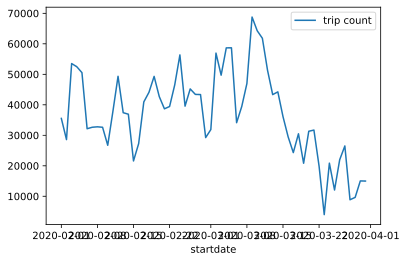

In [7]:
startdate_trips_df.plot(x='startdate', y='trip count', kind='line')

### 2. Stations
Get all station info

In [8]:
station_df = pd.concat(
    [trip_df[['start station id', 'start station name', 'start station latitude', 'start station longitude']].rename(
        columns={'start station id':'station id',
                 'start station name':'station name',
                 'start station latitude':'latitude',
                 'start station longitude':'longitude'}),
    trip_df[['end station id', 'end station name', 'end station latitude', 'end station longitude']].rename(
        columns={'end station id':'station id',
                 'end station name':'station name',
                 'end station latitude':'latitude',
                 'end station longitude':'longitude'})]).drop_duplicates().sort_values('station id')
station_df

,station id,station name,latitude,longitude
243,72,W 52 St & 11 Ave,40.767272,-73.993929
506688,72,W 52 St & 11 Ave,40.767000,-73.995000
20,79,Franklin St & W Broadway,40.719116,-74.006667
799339,79,Franklin St & W Broadway,40.719000,-74.007000
240868,82,St James Pl & Pearl St,40.710000,-74.001000
...,...,...,...,...
253602,3914,West End Ave & W 78 St,40.783786,-73.981687
1580,3916,Pearl St & Peck Slip,40.708485,-74.002751
3499,3917,Willoughby St & Ashland Pl,40.691780,-73.978770
1186,3918,Avenue D & E 8 St,40.723870,-73.975767


Duplication due to different precision

In [9]:
station_df.loc[station_df.duplicated(['station id'], keep=False)] # any duplications?

,station id,station name,latitude,longitude
243,72,W 52 St & 11 Ave,40.767272,-73.993929
506688,72,W 52 St & 11 Ave,40.767000,-73.995000
20,79,Franklin St & W Broadway,40.719116,-74.006667
799339,79,Franklin St & W Broadway,40.719000,-74.007000
240868,82,St James Pl & Pearl St,40.710000,-74.001000
...,...,...,...,...
710643,3787,Dock 72 Way & Market St,40.701000,-73.971000
173000,3812,University Pl & E 14 St,40.734000,-73.992000
8,3812,University Pl & E 14 St,40.734814,-73.992085
64,3818,Calyer St & Jewel St,40.729840,-73.948390


Remove duplications, keep higher precision

In [10]:
station_df['lat_tail'] = (station_df['latitude'] - station_df['latitude'].round(3)).abs()
# remove second
station_df = station_df.sort_values(['station id', 'lat_tail'], ascending = (True, False)).drop_duplicates(
    ['station id', 'station name']).drop(columns=['lat_tail']).reset_index(drop=True)
station_df.loc[station_df.duplicated(['station id'], keep=False)] # any duplications?

,station id,station name,latitude,longitude


Plot station locations

In [11]:
#station_df.plot(kind='scatter', x='longitude', y='latitude')

# Build map 
station_loc_map = folium.Map(location=[40.738, -73.98],
    zoom_start=12, tiles='cartodbpositron', width=640, height=480)

# Plot coordinates using comprehension list
for index, row in station_df.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
    color='#0080bb', fill_color='#0080bb', radius=1).add_to(station_loc_map) 

# Display map in Jupyter
station_loc_map

### 3.Trip per day by station
Group by startdate and station id, join count and station location

In [12]:
# count by startdate
departure_df = trip_df[['starttime', 'bikeid', 'startdate', 'start station id']].groupby(
    ['startdate', 'start station id']).size().reset_index(name='trip count').rename(
    columns={'start station id': 'station id'})
# sort by count
#departure_df.sort_values(['trip count', 'station id', 'startdate'], ascending=(False, True, True))
#departur_pivot_df = departure_df.pivot(index='start station id', columns='startdate', values='trip count').fillna(0)
#plt.subplots(figsize=(20,15))
#sns.heatmap(departur_pivot_df, 
#            cmap='RdBu_r',
#            annot=False,
#            linewidth=0.1)

#Join count and station location
departure_df = departure_df.merge(station_df, how='left', on='station id')

Plot cout data in map

In [13]:
def plot_departure(date):
    oneday = departure_df[departure_df['startdate'] == pd.to_datetime(date)]
    departure_map = folium.Map(location=[40.738, -73.98],
        zoom_start=12, tiles='cartodbpositron', width=640, height=480)
    for index, row in oneday.iterrows():
        radius = row['trip count']/10
        folium.CircleMarker(location=[row['latitude'], row['longitude']],
        stroke=0,fill_color='#0080bb', radius=radius).add_to(departure_map) 
    return departure_map

In [14]:
plot_departure('2020-03-25')

In [15]:
plot_departure('2020-03-01')